<a href="https://colab.research.google.com/github/j-ranasinghe/Spam-E-mail-Detection/blob/main/Spam_E_mail_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

# Importing the dataset

In [42]:
cols = ['capital_run_length_total','capital_run_length_longest','capital_run_length_average','char_freq_#','char_freq_$','char_freq_!','char_freq_[','char_freq_(','char_freq_;','word_freq_conference','word_freq_table','word_freq_edu','word_freq_re','word_freq_project','word_freq_original','word_freq_meeting','word_freq_cs','word_freq_direct','word_freq_pm','word_freq_parts','word_freq_1999','word_freq_technology','word_freq_85','word_freq_415','word_freq_data','word_freq_857','word_freq_telnet','word_freq_labs','word_freq_lab','word_freq_650','word_freq_george','word_freq_hpl','word_freq_hp','word_freq_money','word_freq_000','word_freq_font','word_freq_your','word_freq_credit','word_freq_you','word_freq_email','word_freq_business','word_freq_free','word_freq_addresses','word_freq_report','word_freq_people','word_freq_will','word_freq_receive','word_freq_mail','word_freq_order','word_freq_internet','word_freq_remove','word_freq_over','word_freq_our','word_freq_3d','word_freq_all','word_freq_address','word_freq_make','class']
df = pd.read_csv('spambase.data' , names= cols )
#d = preprocessing.normalize(df, axis = 1)
#scaled_df = pd.DataFrame(d, columns=names)
df.head()

,capital_run_length_total,capital_run_length_longest,capital_run_length_average,char_freq_#,char_freq_$,char_freq_!,char_freq_[,char_freq_(,char_freq_;,word_freq_conference,...,word_freq_order,word_freq_internet,word_freq_remove,word_freq_over,word_freq_our,word_freq_3d,word_freq_all,word_freq_address,word_freq_make,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [43]:
df.head(20)

,capital_run_length_total,capital_run_length_longest,capital_run_length_average,char_freq_#,char_freq_$,char_freq_!,char_freq_[,char_freq_(,char_freq_;,word_freq_conference,...,word_freq_order,word_freq_internet,word_freq_remove,word_freq_over,word_freq_our,word_freq_3d,word_freq_all,word_freq_address,word_freq_make,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [44]:
df.tail(10)

,capital_run_length_total,capital_run_length_longest,capital_run_length_average,char_freq_#,char_freq_$,char_freq_!,char_freq_[,char_freq_(,char_freq_;,word_freq_conference,...,word_freq_order,word_freq_internet,word_freq_remove,word_freq_over,word_freq_our,word_freq_3d,word_freq_all,word_freq_address,word_freq_make,class
4591,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,8,0
4592,0.00,0.0,1.25,0.0,2.50,0.00,0.0,0.0,0.0,0.0,...,0.000,0.111,0.0,0.000,0.0,0.0,1.285,4,27,0
4593,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,1.052,0.0,0.0,1.000,1,6,0
4594,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.630,0.0,0.000,0.0,0.0,1.727,5,19,0
4595,0.00,0.0,1.19,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,24,0
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


# Data Visualisation

In [45]:
df.dtypes #Check the data type of the attributes


capital_run_length_total      float64
capital_run_length_longest    float64
capital_run_length_average    float64
char_freq_#                   float64
char_freq_$                   float64
char_freq_!                   float64
char_freq_[                   float64
char_freq_(                   float64
char_freq_;                   float64
word_freq_conference          float64
word_freq_table               float64
word_freq_edu                 float64
word_freq_re                  float64
word_freq_project             float64
word_freq_original            float64
word_freq_meeting             float64
word_freq_cs                  float64
word_freq_direct              float64
word_freq_pm                  float64
word_freq_parts               float64
word_freq_1999                float64
word_freq_technology          float64
word_freq_85                  float64
word_freq_415                 float64
word_freq_data                float64
word_freq_857                 float64
word_freq_te

In [46]:
df.shape #Check the shape of the dataset

(4601, 58)

In [47]:
#Check the distribution of the spam vs not-spam 
new_class = pd.Categorical(df["class"])
new_class = new_class.rename_categories(["spam","not_spam"])              

new_class.describe()

,counts,freqs
categories,,
spam,2788,0.605955
not_spam,1813,0.394045


In [48]:
df.describe() #Get the descriptions of each attribute

,capital_run_length_total,capital_run_length_longest,capital_run_length_average,char_freq_#,char_freq_$,char_freq_!,char_freq_[,char_freq_(,char_freq_;,word_freq_conference,...,word_freq_order,word_freq_internet,word_freq_remove,word_freq_over,word_freq_our,word_freq_3d,word_freq_all,word_freq_address,word_freq_make,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [49]:
df.isnull()

,capital_run_length_total,capital_run_length_longest,capital_run_length_average,char_freq_#,char_freq_$,char_freq_!,char_freq_[,char_freq_(,char_freq_;,word_freq_conference,...,word_freq_order,word_freq_internet,word_freq_remove,word_freq_over,word_freq_our,word_freq_3d,word_freq_all,word_freq_address,word_freq_make,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


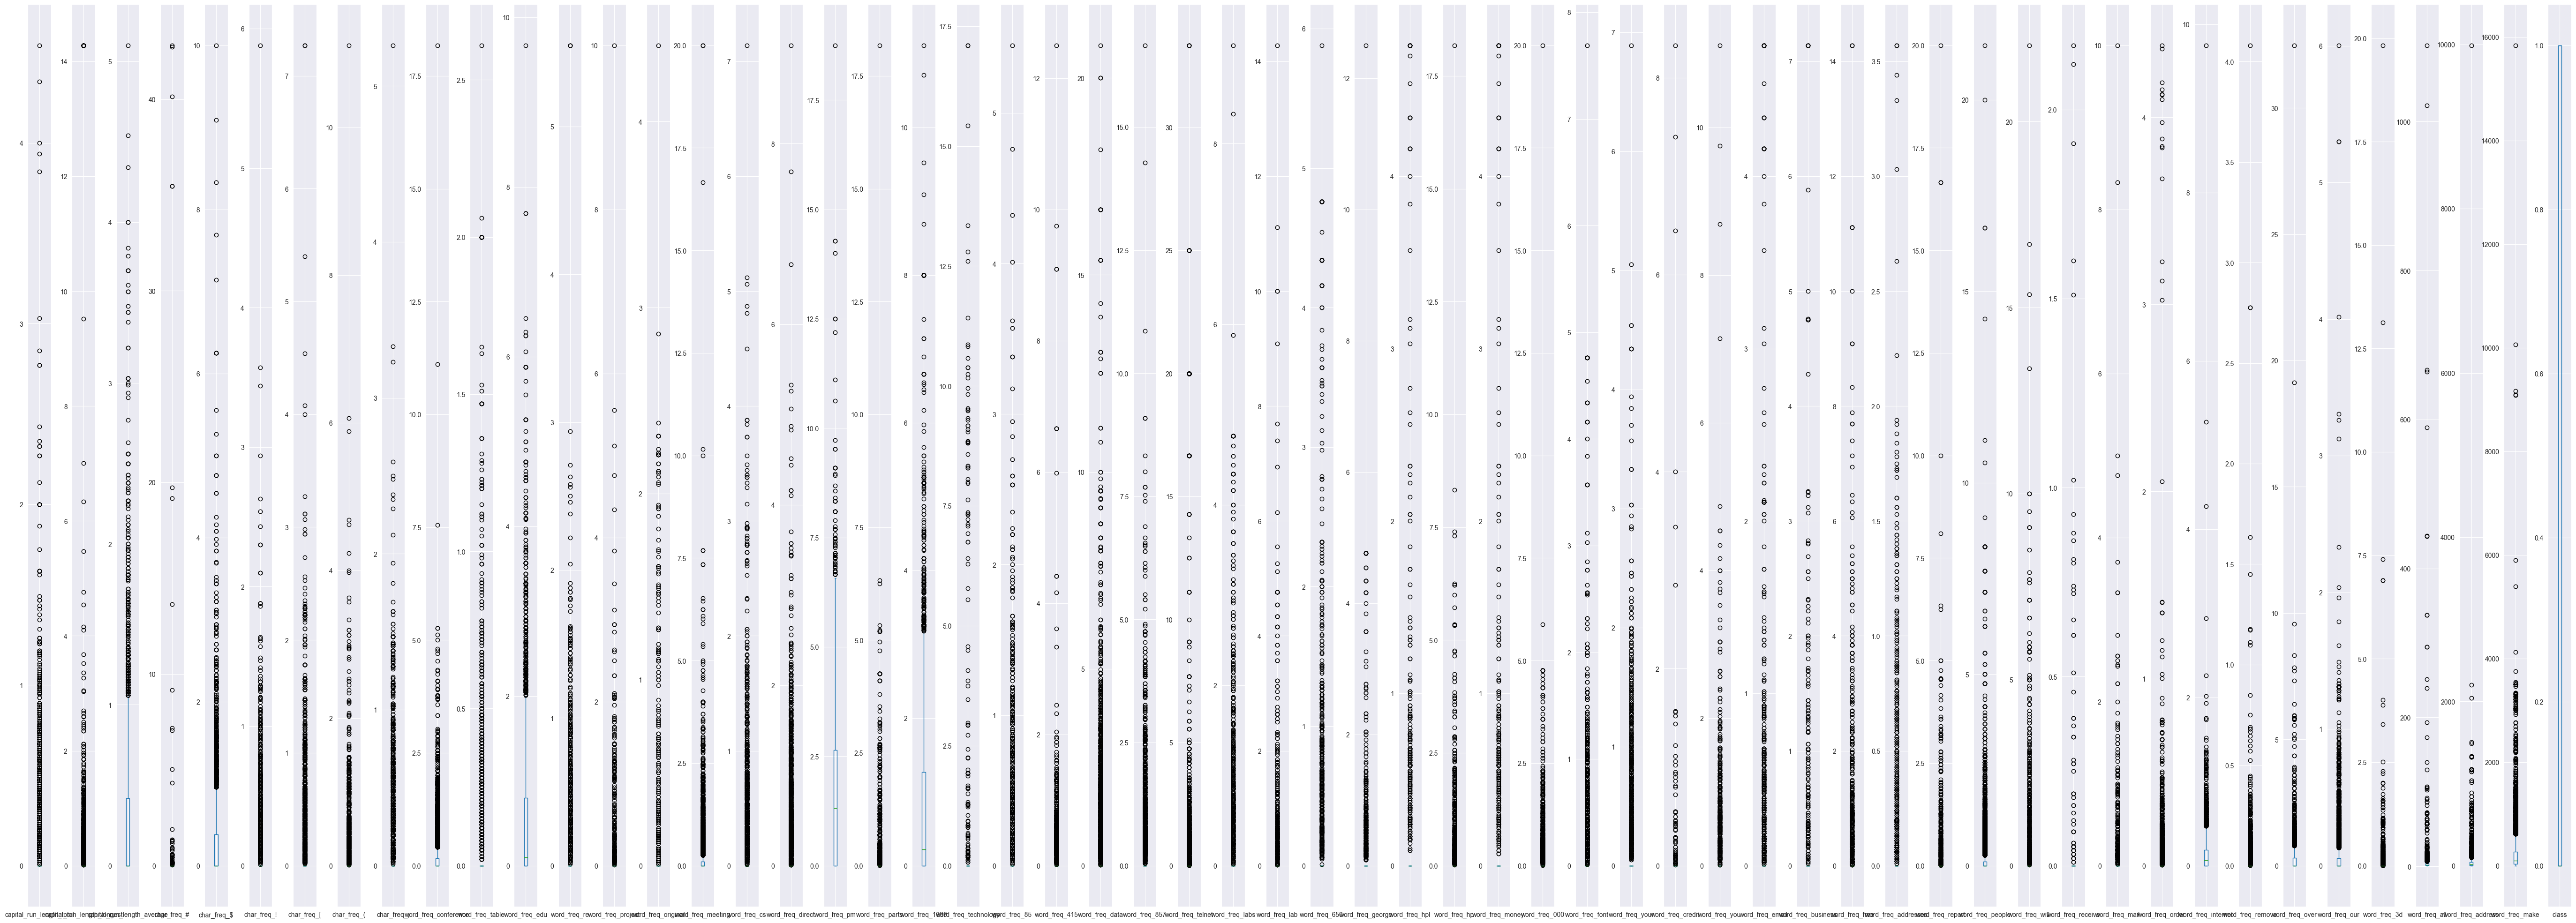

In [50]:
#Boxplot to for outliers
for label in cols[:-1]:
    # for label in range(0,5):
    df.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(70, 25)
    )
        # increase spacing between subplots
    plt.subplots_adjust(wspace=0.9) 
    plt.show()
    break

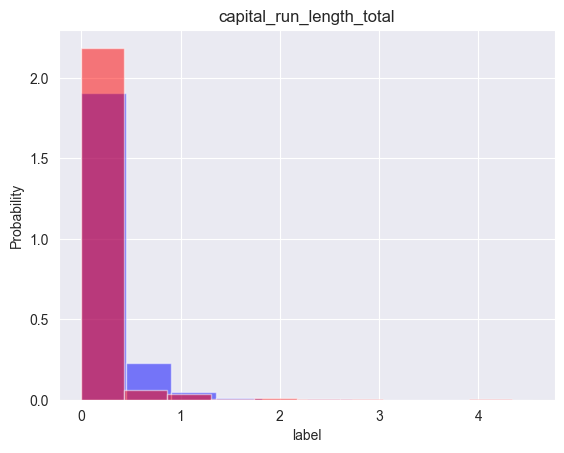

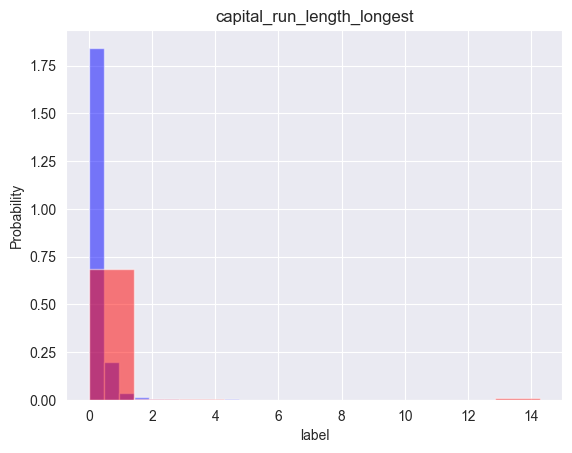

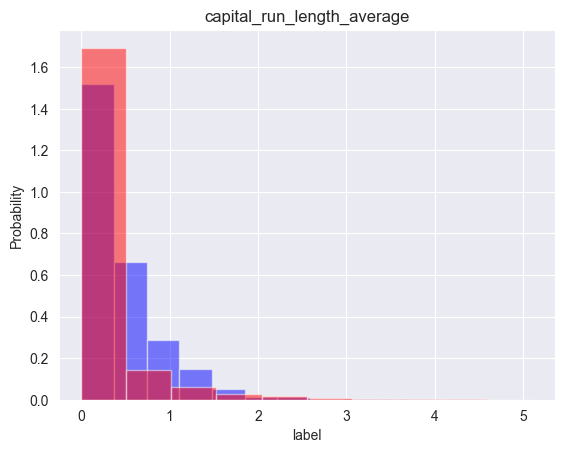

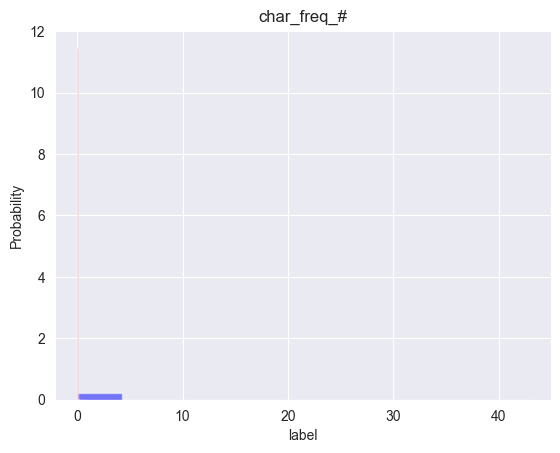

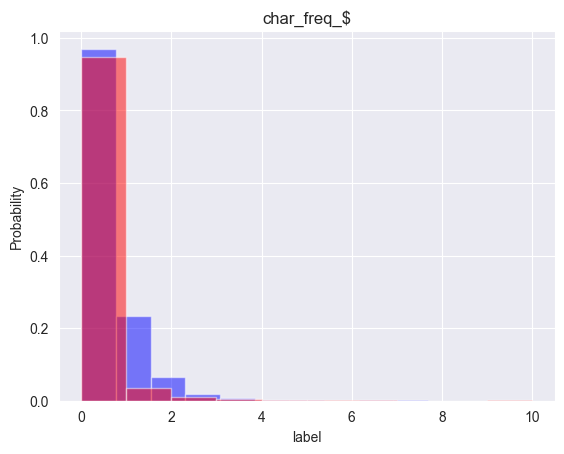

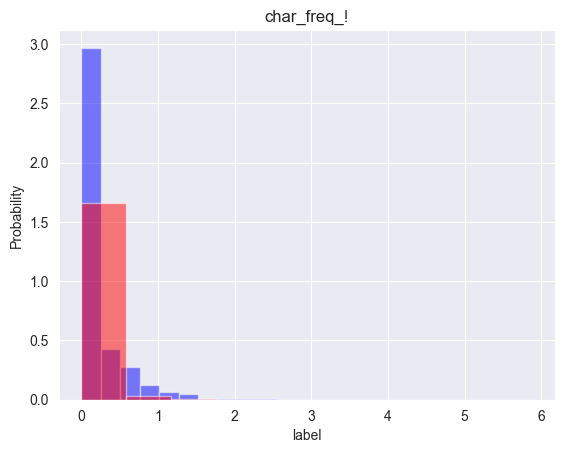

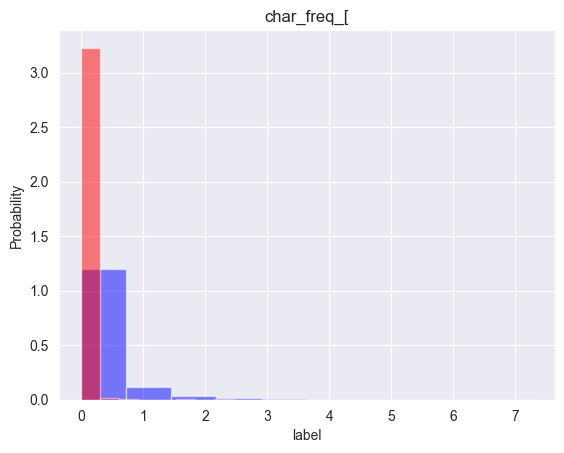

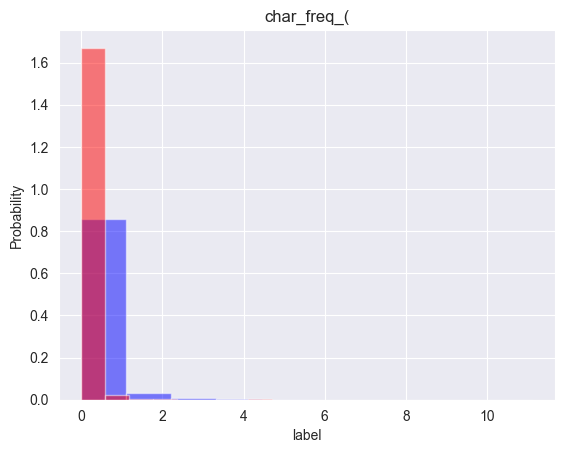

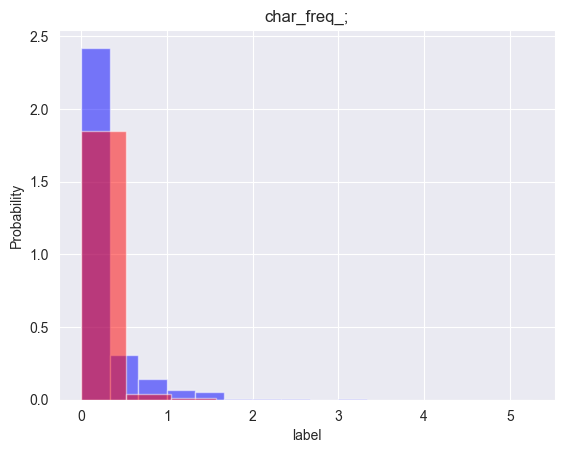

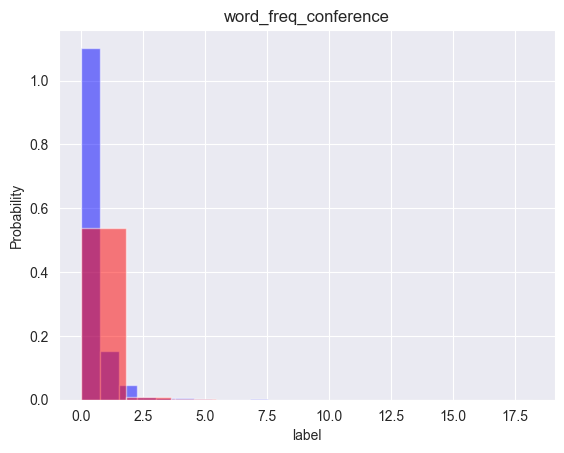

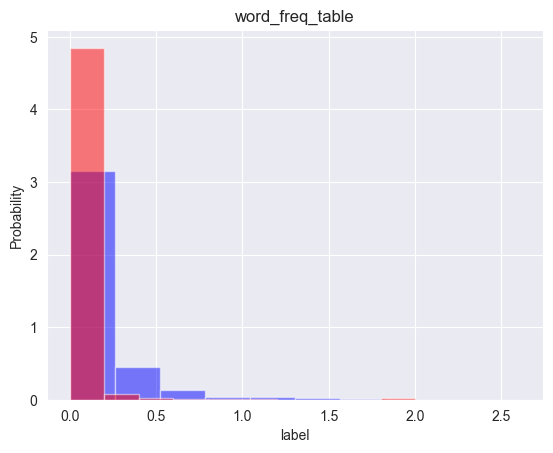

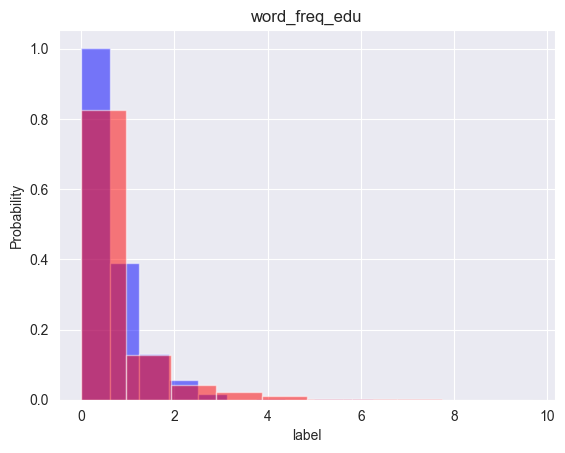

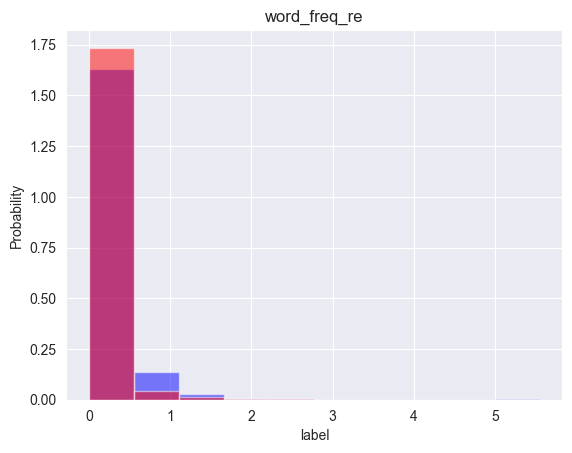

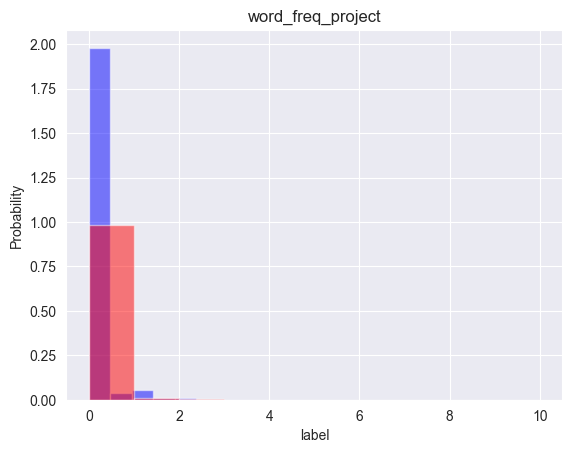

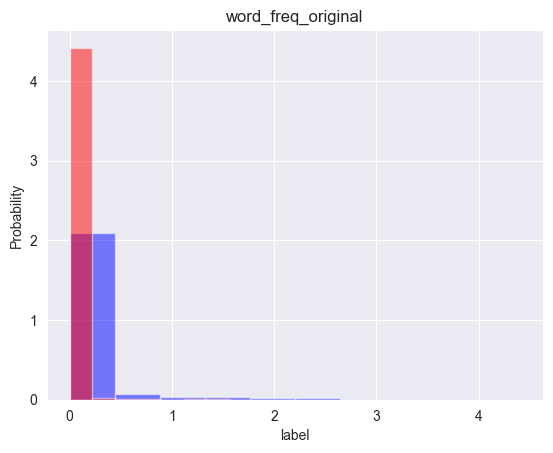

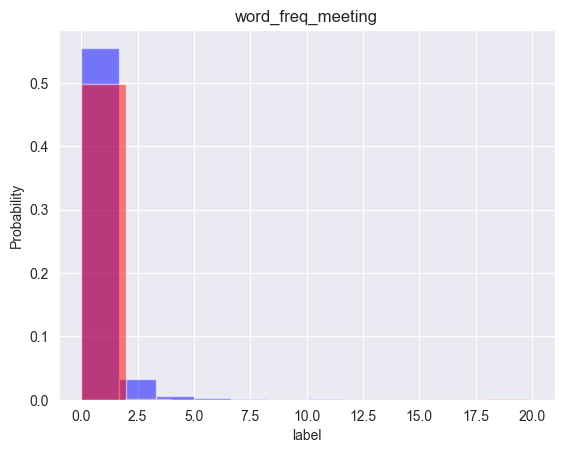

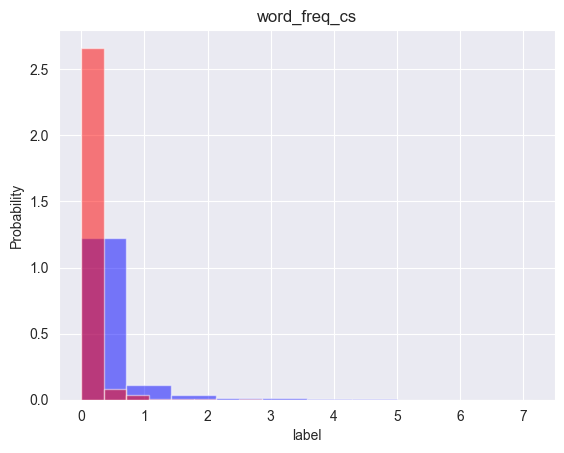

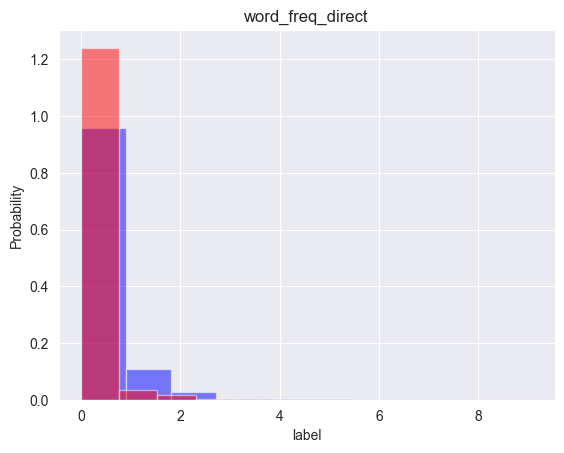

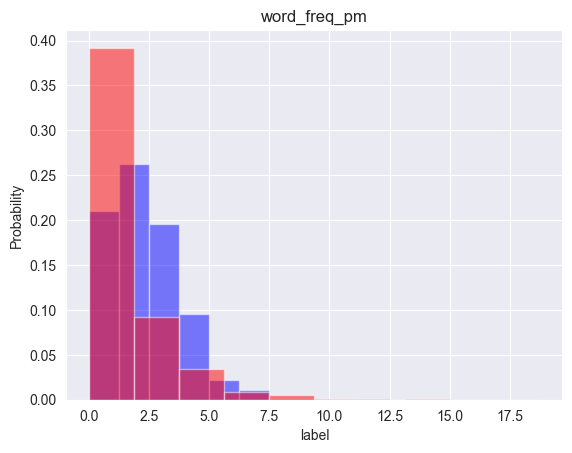

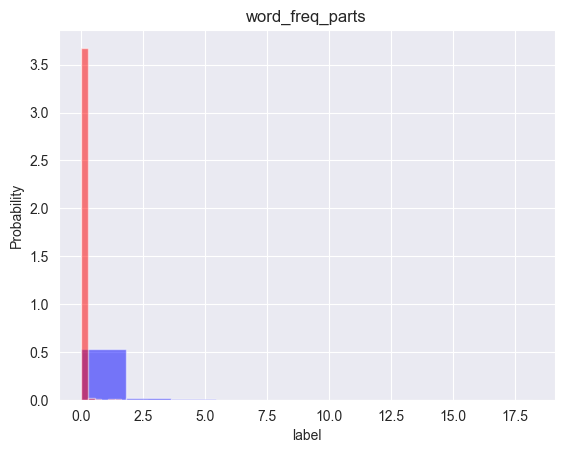

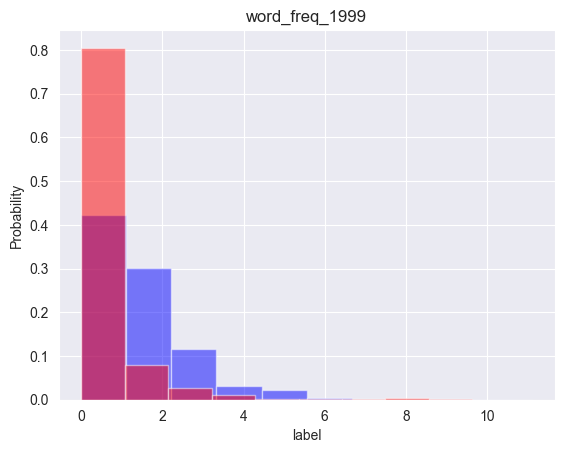

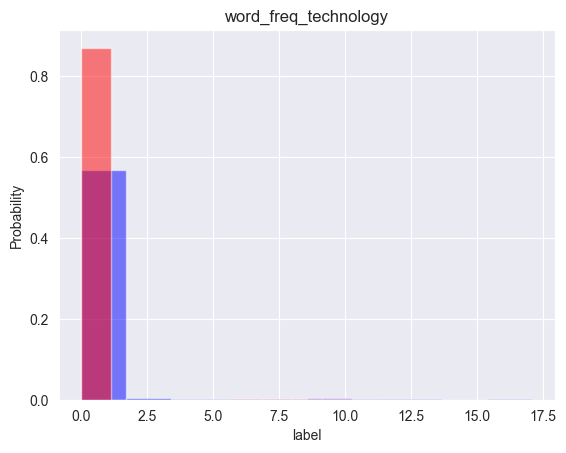

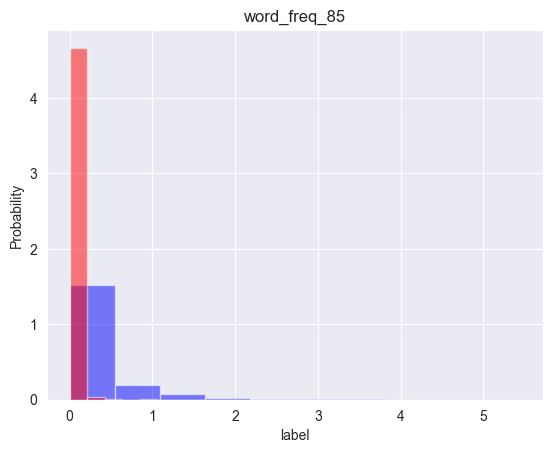

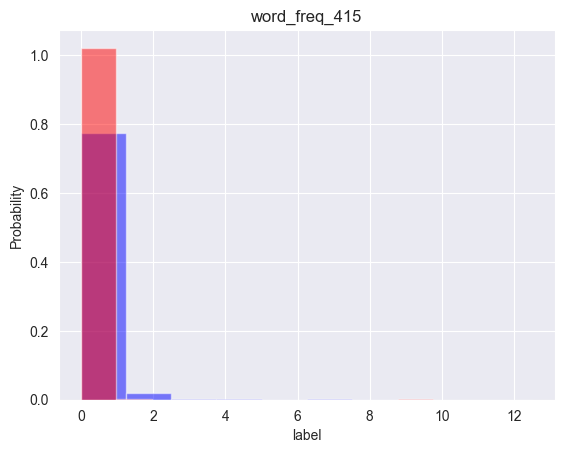

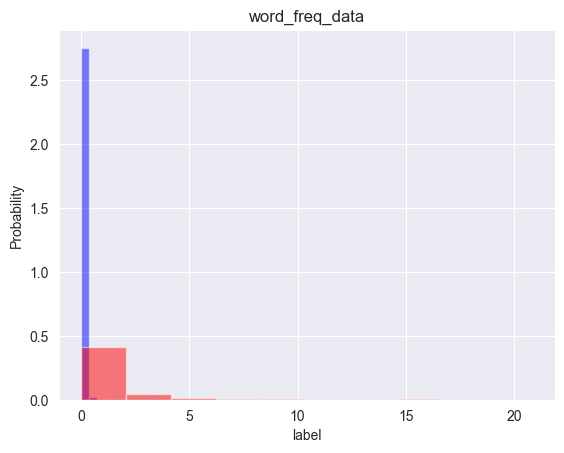

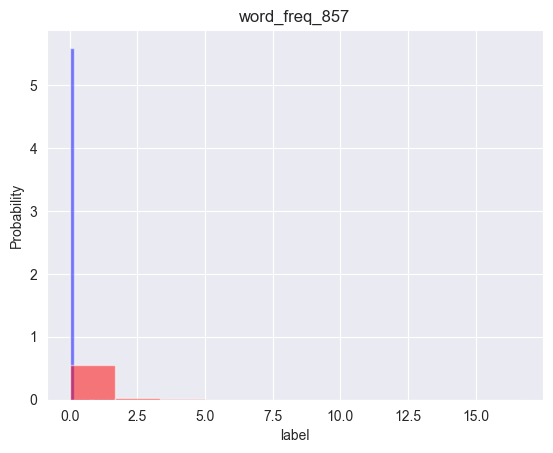

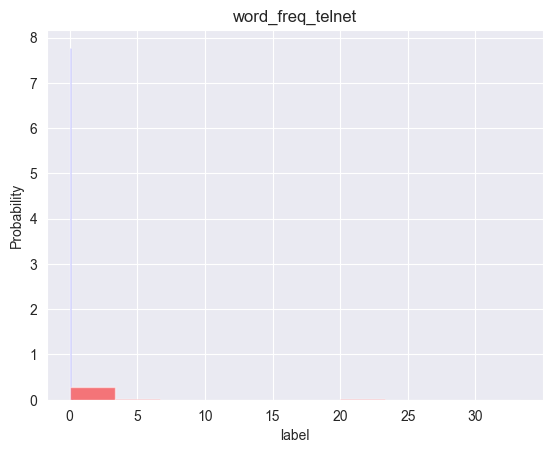

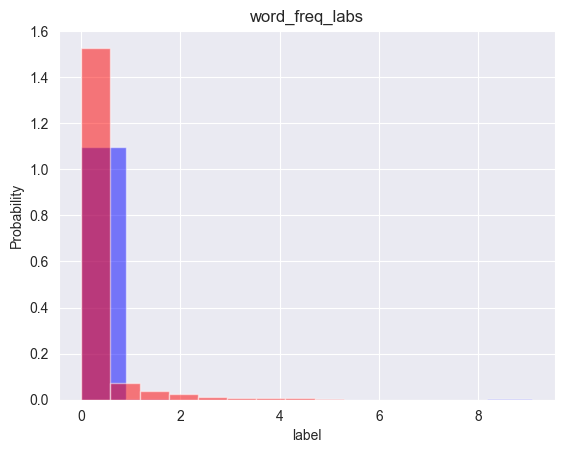

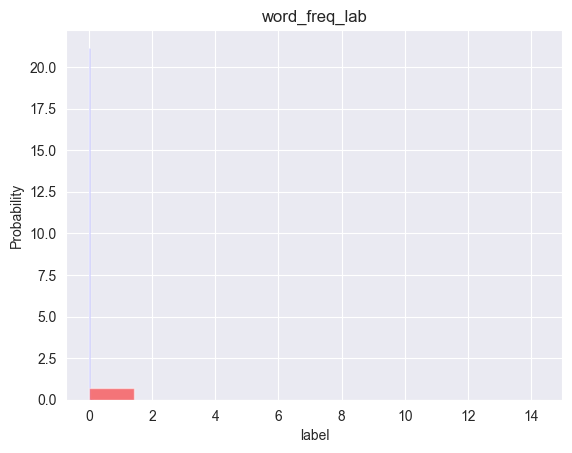

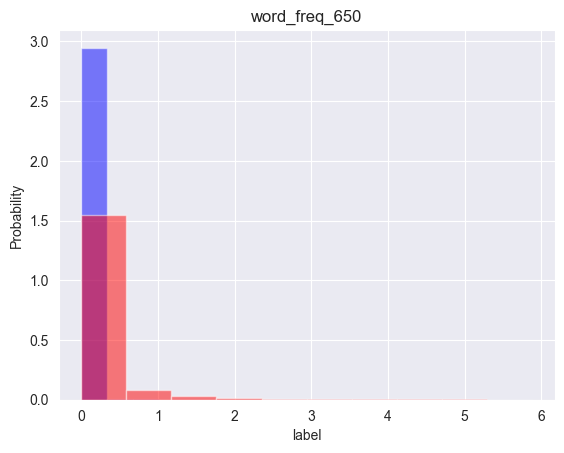

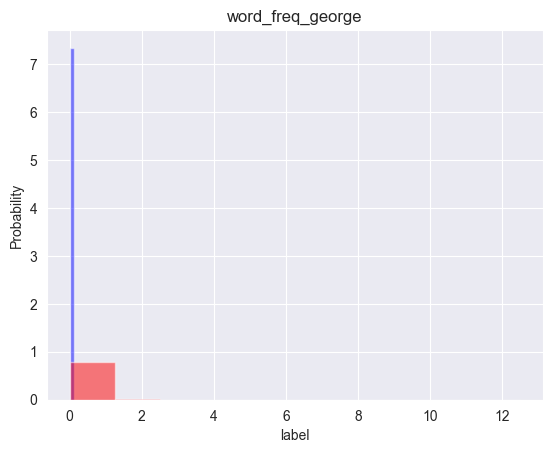

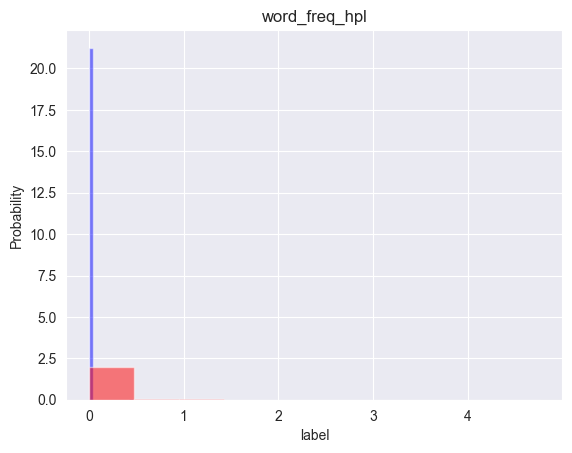

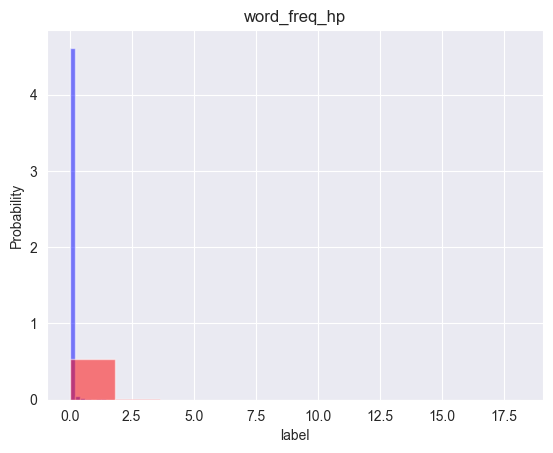

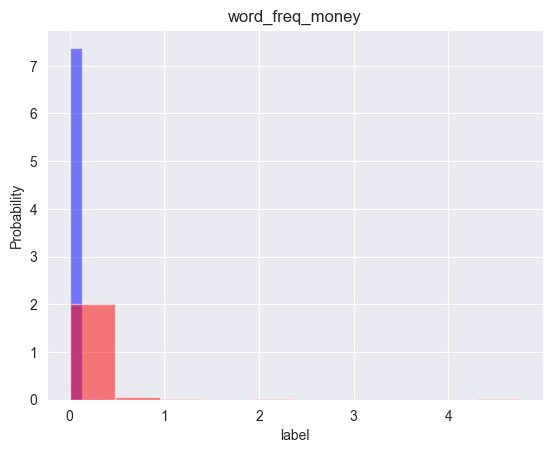

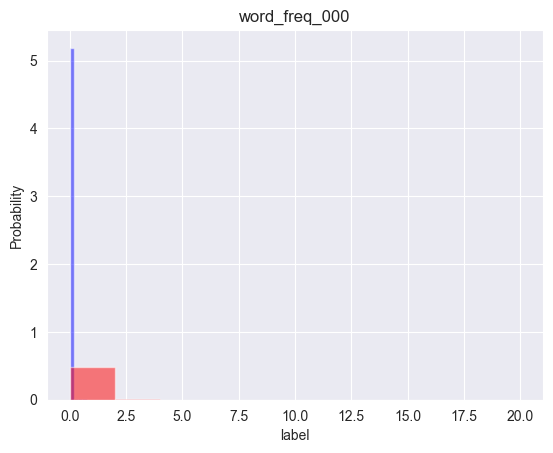

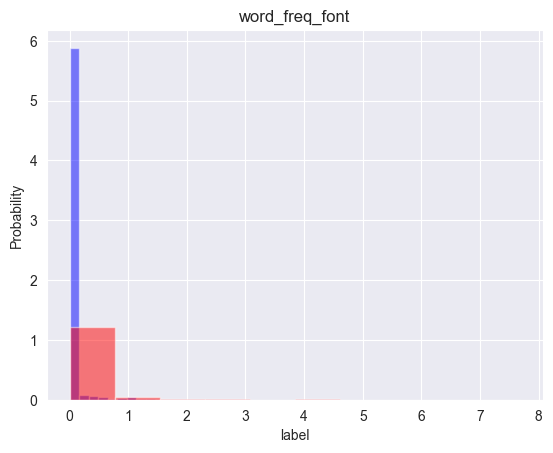

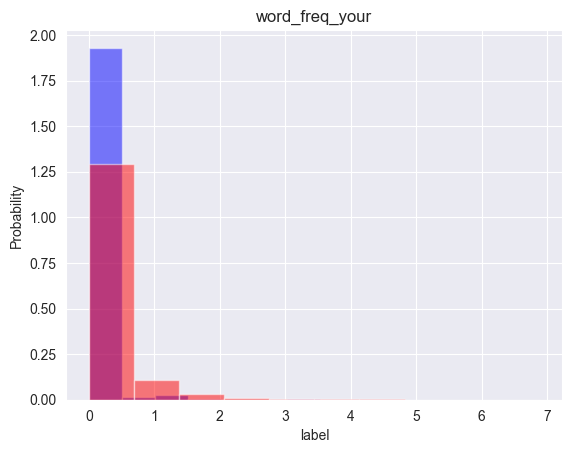

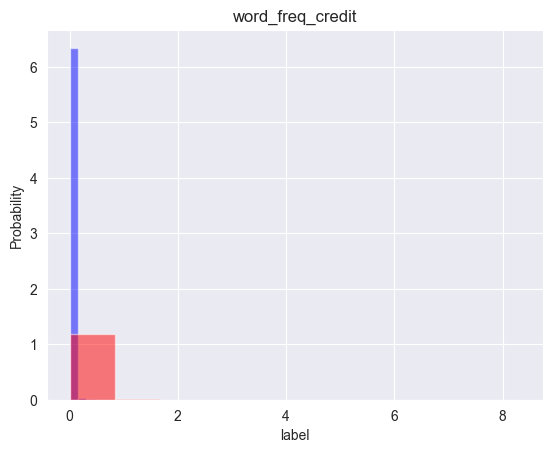

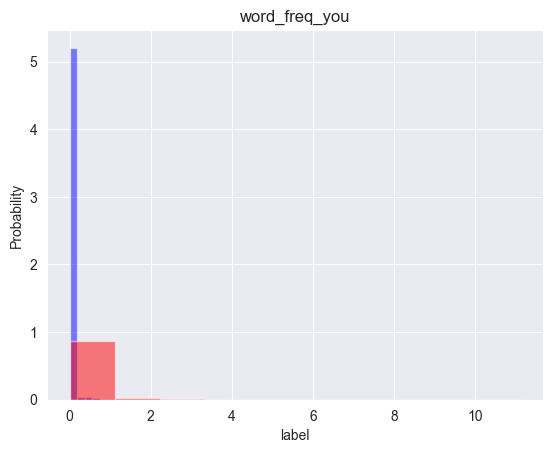

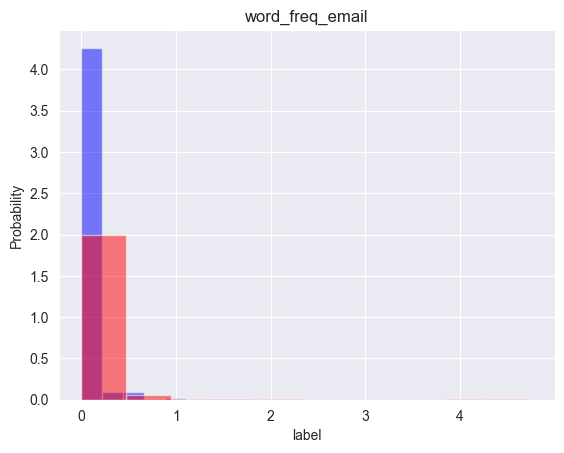

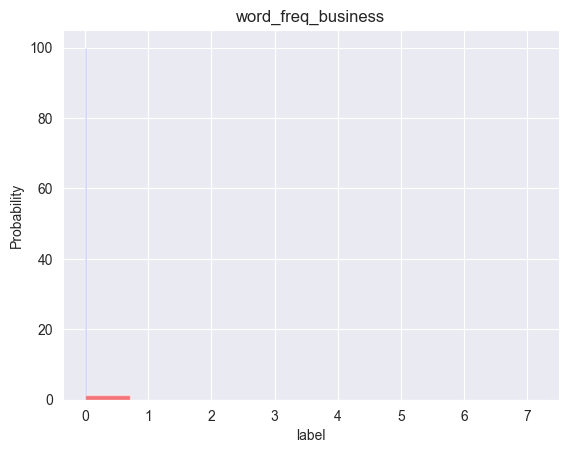

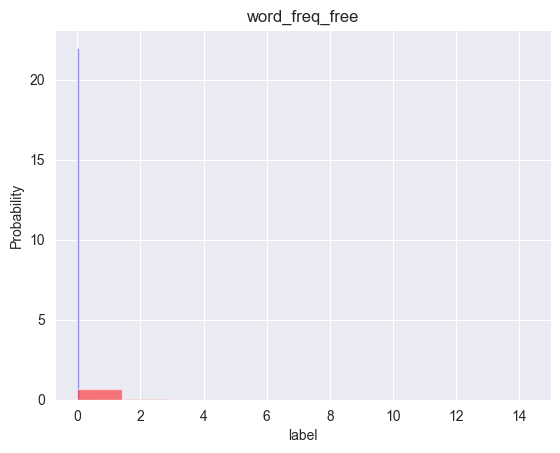

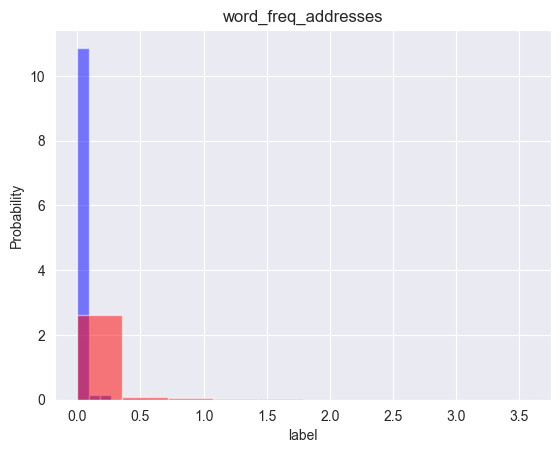

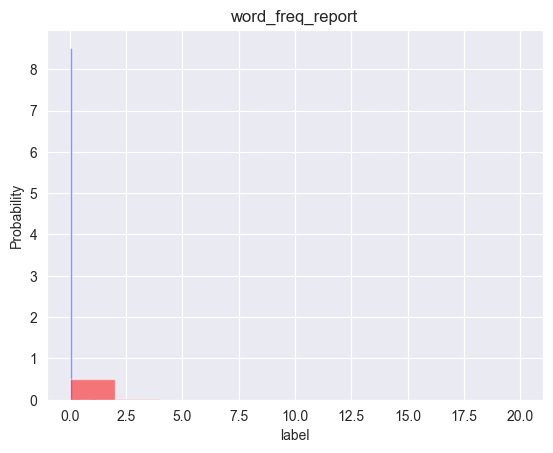

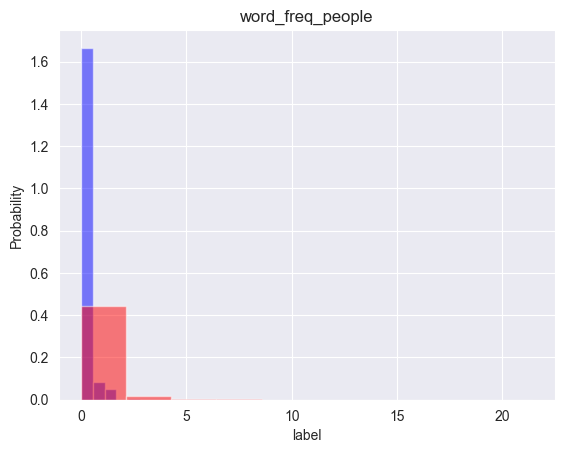

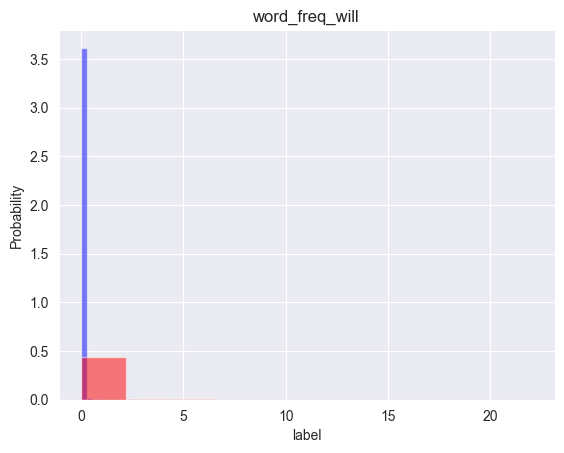

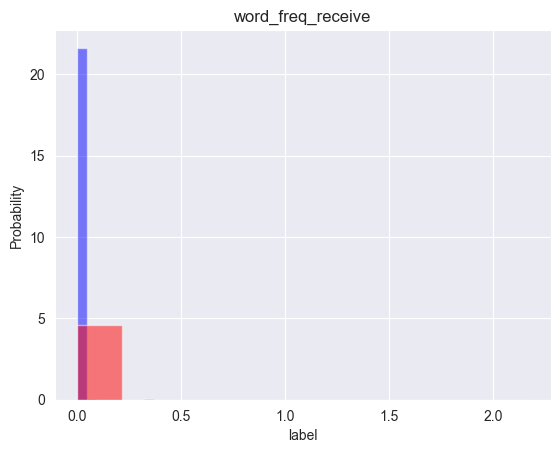

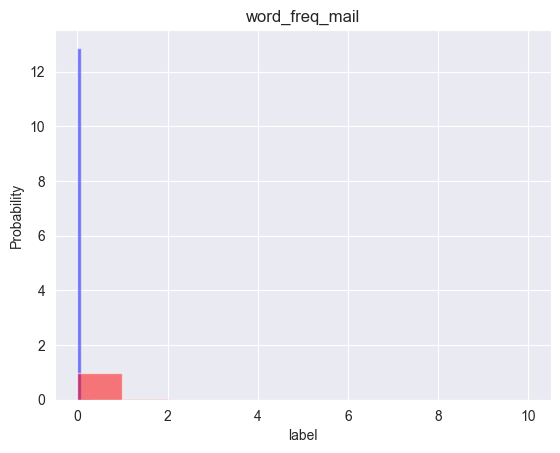

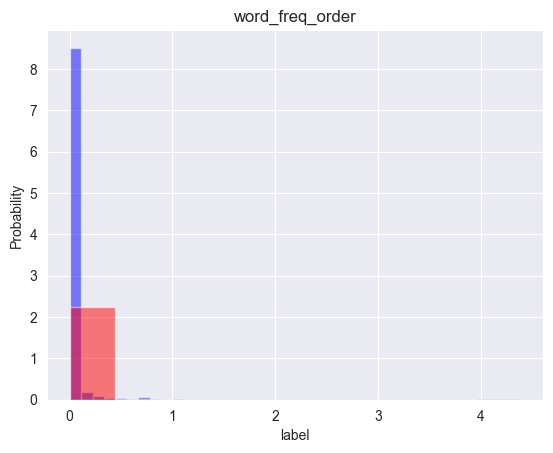

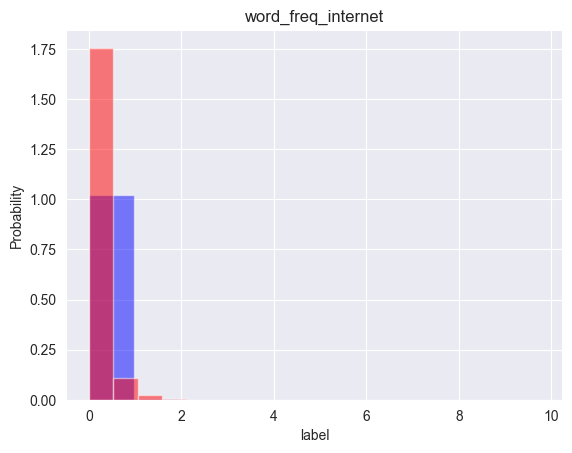

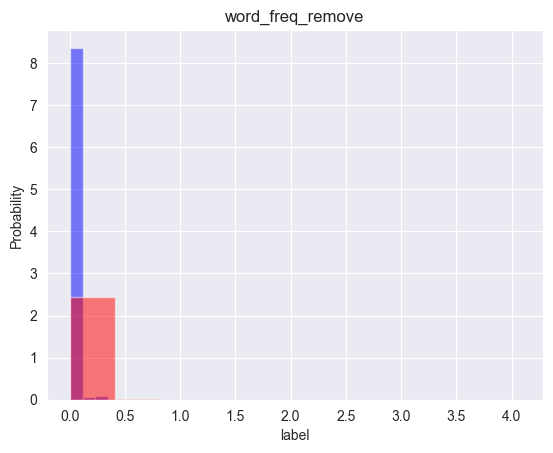

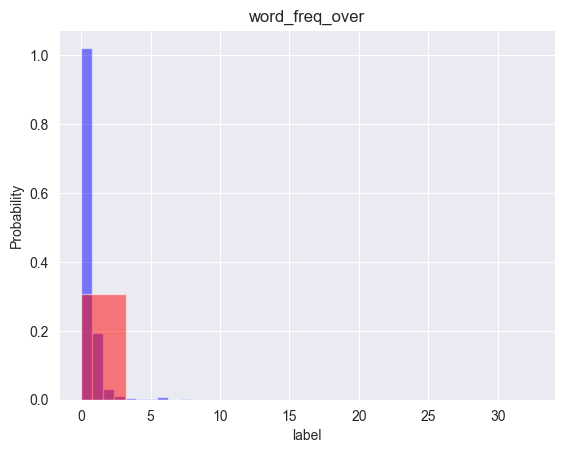

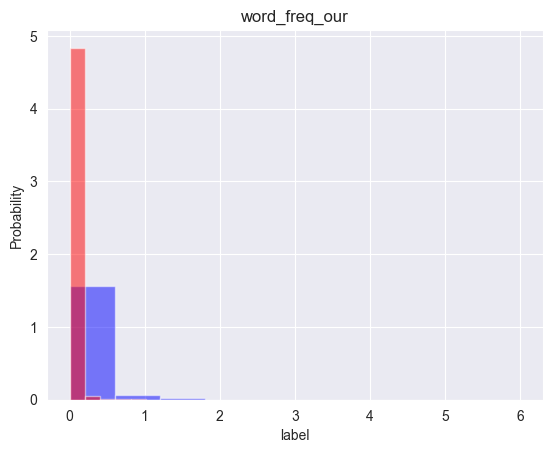

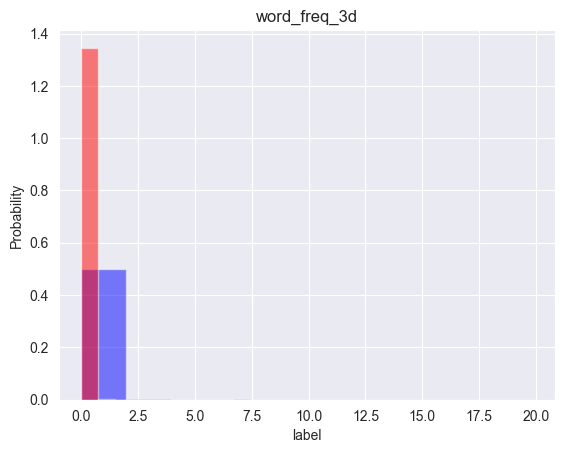

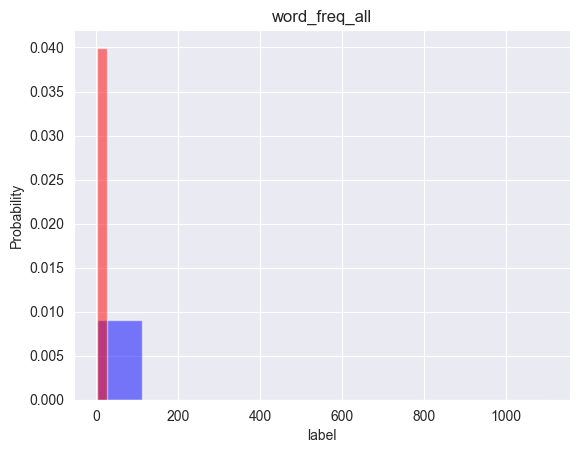

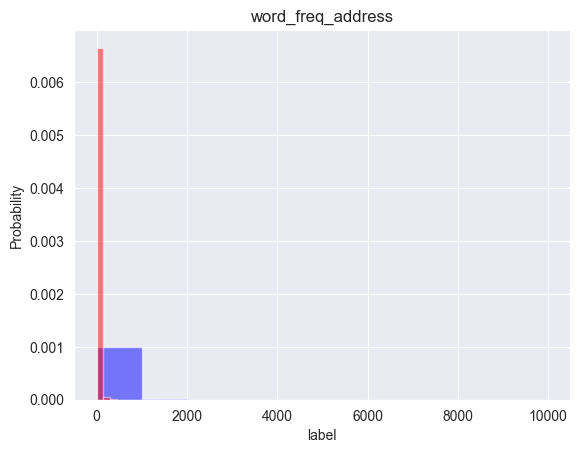

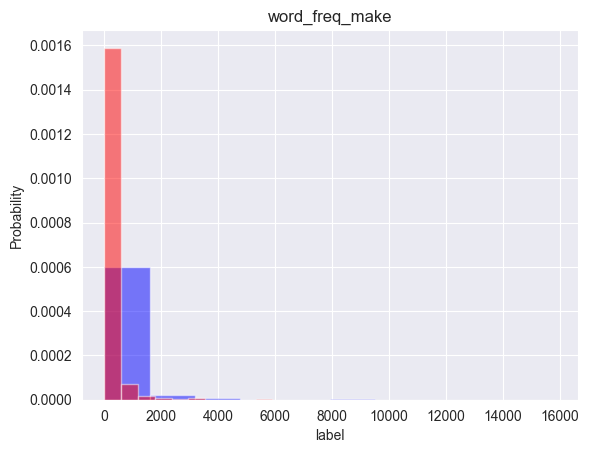

In [51]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color= 'blue',label='spam',alpha=0.5,density = True)
  plt.hist(df[df["class"]==0][label],color= 'red',label='non-spam',alpha=0.5,density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel("label")
  plt.show()


In [52]:
X = df.drop(['capital_run_length_total','word_freq_project','word_freq_conference','capital_run_length_longest','char_freq_#','word_freq_remove','word_freq_3d','word_freq_receive','word_freq_mail',], axis = 1)

In [53]:
X.head(12)


,capital_run_length_average,char_freq_$,char_freq_!,char_freq_[,char_freq_(,char_freq_;,word_freq_table,word_freq_edu,word_freq_re,word_freq_original,...,word_freq_people,word_freq_will,word_freq_order,word_freq_internet,word_freq_over,word_freq_our,word_freq_all,word_freq_address,word_freq_make,class
0,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,...,0.00,0.00,0.000,0.000,0.778,0.000,3.756,61,278,1
1,0.50,0.14,0.28,0.21,0.07,0.00,0.21,0.79,0.65,0.14,...,0.00,0.00,0.000,0.132,0.372,0.180,5.114,101,1028,1
2,0.71,1.23,0.19,0.19,0.12,0.64,0.38,0.45,0.12,1.75,...,0.06,0.06,0.010,0.143,0.276,0.184,9.821,485,2259,1
3,0.00,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.31,0.00,...,0.00,0.00,0.000,0.137,0.137,0.000,3.537,40,191,1
4,0.00,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.31,0.00,...,0.00,0.00,0.000,0.135,0.135,0.000,3.537,40,191,1
5,0.00,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.000,0.223,0.000,0.000,3.000,15,54,1
6,0.00,1.92,0.00,0.00,0.00,0.00,0.96,1.28,0.00,0.00,...,0.00,0.00,0.000,0.054,0.164,0.054,1.671,4,112,1
7,0.00,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.000,0.206,0.000,0.000,2.450,11,49,1
8,0.46,0.61,0.00,0.30,0.00,0.92,0.76,0.92,0.00,0.00,...,0.00,0.00,0.000,0.271,0.181,0.203,9.744,445,1257,1
9,0.77,0.19,0.32,0.38,0.00,0.06,0.00,0.64,0.25,0.12,...,0.00,0.00,0.040,0.030,0.244,0.081,1.729,43,749,1


In [54]:
X.tail(12)

,capital_run_length_average,char_freq_$,char_freq_!,char_freq_[,char_freq_(,char_freq_;,word_freq_table,word_freq_edu,word_freq_re,word_freq_original,...,word_freq_people,word_freq_will,word_freq_order,word_freq_internet,word_freq_over,word_freq_our,word_freq_all,word_freq_address,word_freq_make,class
4589,0.00,0.54,0.00,0.0,0.0,0.0,0.0,0.54,0.00,0.0,...,0.00,0.54,0.000,0.000,0.000,0.0,1.000,1,22,0
4590,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.58,0.00,0.0,...,0.00,0.58,0.000,0.185,0.000,0.0,2.468,11,79,0
4591,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,3.44,0.000,0.000,0.000,0.0,1.000,1,8,0
4592,1.25,2.50,0.00,0.0,0.0,0.0,0.0,0.00,0.62,0.0,...,0.62,0.62,0.000,0.111,0.000,0.0,1.285,4,27,0
4593,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,7.69,0.000,0.000,1.052,0.0,1.000,1,6,0
4594,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.61,0.00,0.0,...,0.00,1.61,0.000,0.630,0.000,0.0,1.727,5,19,0
4595,1.19,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,0.59,0.000,0.000,0.000,0.0,1.000,1,24,0
4596,0.62,0.00,0.31,0.0,0.0,0.0,0.0,1.88,0.00,0.0,...,0.31,0.31,0.000,0.232,0.000,0.0,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,2.00,0.000,0.000,0.353,0.0,1.555,4,14,0
4598,0.30,0.00,0.00,0.0,0.0,0.0,0.0,1.80,0.30,0.0,...,0.00,1.20,0.102,0.718,0.000,0.0,1.404,6,118,0
